## eda for titanic prediction

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [69]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
print(df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [74]:
# df = df.drop('Cabin',axis=1)
test_df = test_df.drop('Cabin',axis=1)

In [75]:
df['Age']  = df['Age'].fillna(df['Age'].mean())


In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df = df.drop('Name',axis=1)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
categorical = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
numerical = ['Age', 'Fare']

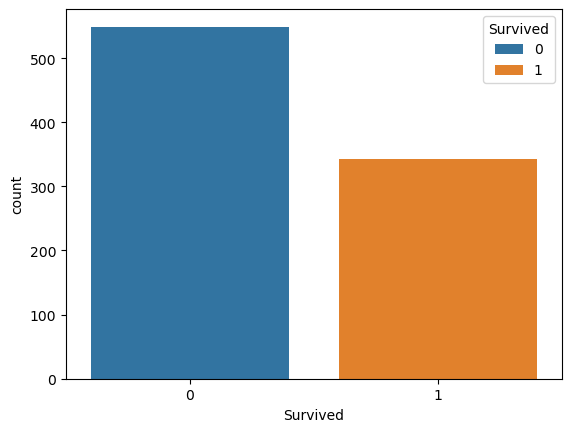

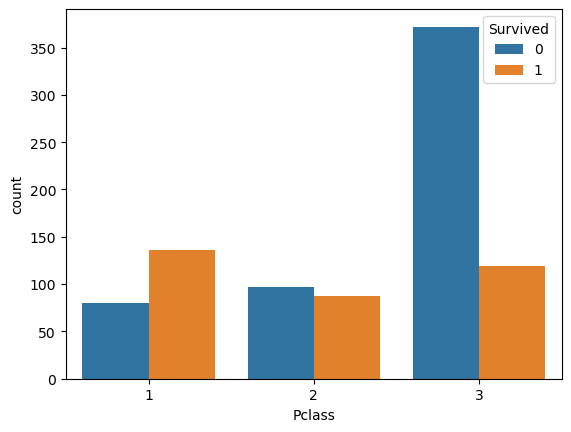

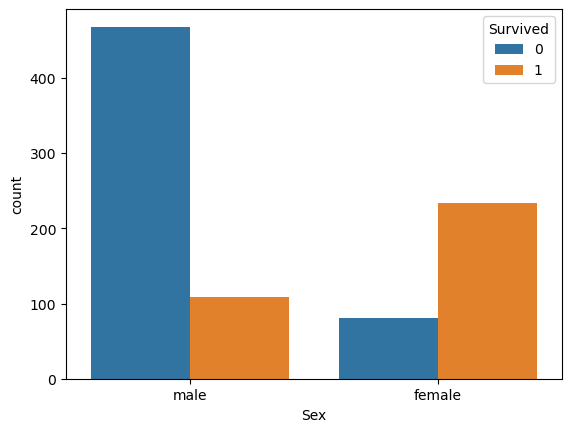

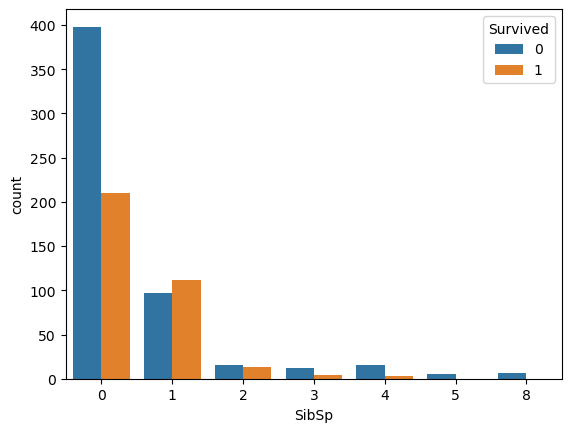

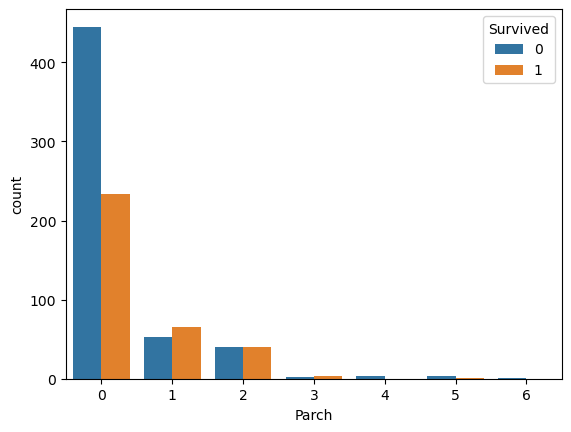

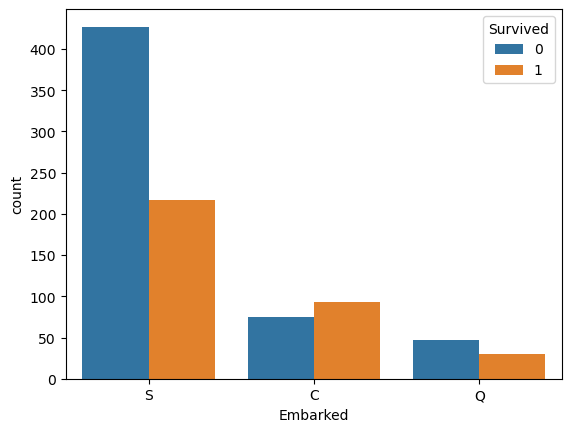

In [80]:
for cat in categorical:
    plt.figure()
    sns.countplot(data = df, x = cat, hue = 'Survived')


// pclass sex Sibsp + Parch Embarked

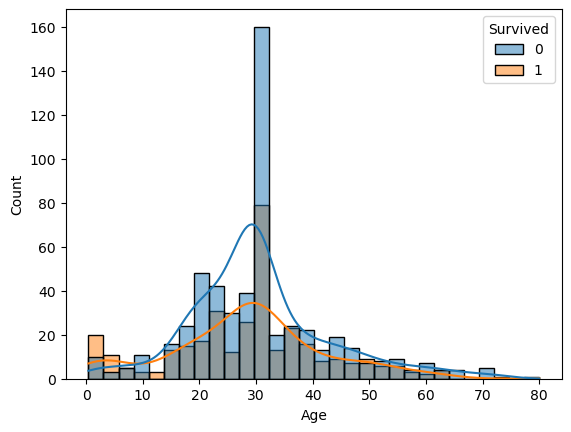

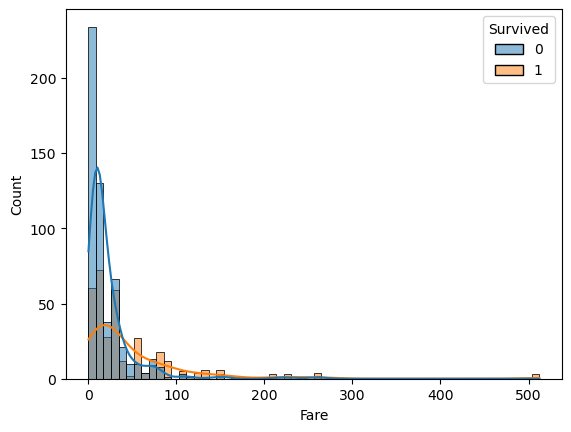

In [81]:
for num in numerical:
    plt.figure()
    sns.histplot(data=df, x = num, hue='Survived',palette='tab10', kde=True)

In [82]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C


In [83]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
df.loc[df['Fare'] > upper_bound, 'Fare'] = df['Fare'].median()


<Axes: xlabel='Fare', ylabel='Count'>

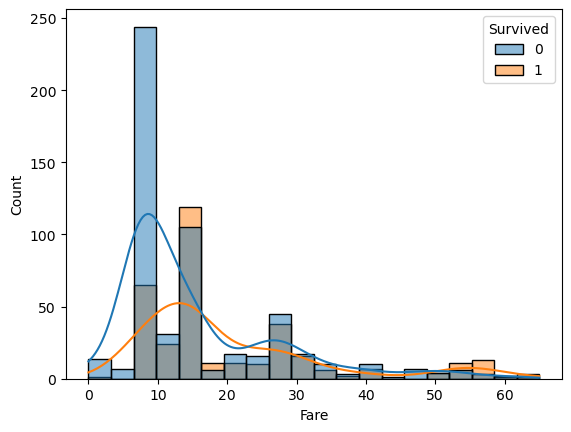

In [84]:
sns.histplot(data=df, x = 'Fare', hue='Survived',palette='tab10', kde=True)

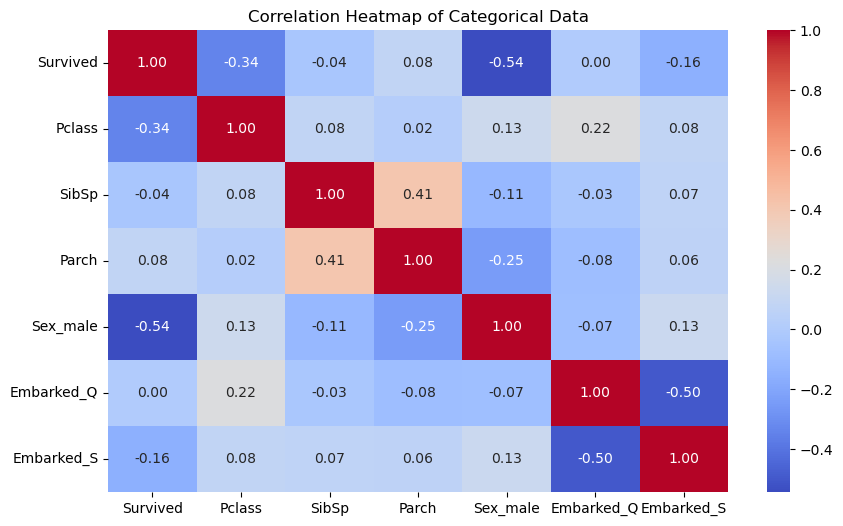

In [85]:
# Encode categorical variables
encoded_df = pd.get_dummies(df[categorical], drop_first=True)

# Calculate correlation matrix
correlation_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Categorical Data')
plt.show()

In [86]:
#pclass and sex are most correlated with survived

In [87]:
encoded_df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
encoded_df['IsAlone'] = (encoded_df['FamilySize'] == 1).astype(int)
encoded_df = encoded_df.drop(['Parch','SibSp'],axis=1)

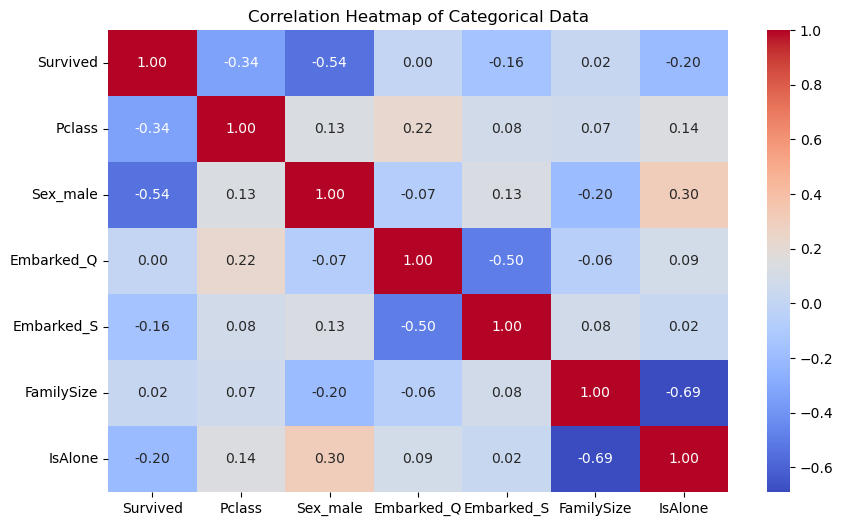

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Categorical Data')
plt.show()

In [89]:
encoded_df.sample(8)

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
855,1,3,False,False,True,2,0
726,1,2,False,False,True,4,0
852,0,3,False,False,False,3,0
690,1,1,True,False,True,2,0
208,1,3,False,True,False,1,1
154,0,3,True,False,True,1,1
306,1,1,False,False,False,1,1
209,1,1,True,False,False,1,1


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
scaler.fit_transform(encoded_df)

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.61930636,
         0.05915988, -1.2316449 ],
       [ 1.2669898 , -1.56610693, -1.35557354, ..., -1.61470971,
         0.05915988, -1.2316449 ],
       [ 1.2669898 ,  0.82737724, -1.35557354, ...,  0.61930636,
        -0.56097483,  0.81192233],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.61930636,
         1.29942929, -1.2316449 ],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -1.61470971,
        -0.56097483,  0.81192233],
       [-0.78927234,  0.82737724,  0.73769513, ..., -1.61470971,
        -0.56097483,  0.81192233]], shape=(891, 7))

In [92]:
encoded_df.sample(9)

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
589,0,3,True,False,True,1,1
629,0,3,True,True,False,1,1
484,1,1,True,False,False,2,0
357,0,2,False,False,True,1,1
584,0,3,True,False,False,1,1
722,0,2,True,False,True,1,1
758,0,3,True,False,True,1,1
440,1,2,False,False,True,3,0
80,0,3,True,False,True,1,1


In [93]:
encoded_df = encoded_df.astype(int)

In [94]:
encoded_df.sample(9)
X = encoded_df.drop('Survived',axis=1)
y = encoded_df['Survived']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model_lr = LogisticRegression()

In [99]:
model_lr.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
test_df['Age']  = test_df['Age'].fillna(test_df['Age'].mean())


In [101]:
test_df = test_df.drop('Name',axis=1)


In [102]:
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
test_df.loc[test_df['Fare'] > upper_bound, 'Fare'] = test_df['Fare'].median()

In [103]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.50000,0,0,330911,7.8292,Q
1,893,3,female,47.00000,1,0,363272,7.0000,S
2,894,2,male,62.00000,0,0,240276,9.6875,Q
3,895,3,male,27.00000,0,0,315154,8.6625,S
4,896,3,female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.00000,0,0,PC 17758,14.4542,C
415,1307,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,30.27259,0,0,359309,8.0500,S


In [104]:
# Encode categorical variables
passenger_id = test_df['PassengerId']
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
encoded_df_test = pd.get_dummies(test_df[categorical], drop_first=True)



In [105]:
encoded_df_test

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,True,True,False
1,3,1,0,False,False,True
2,2,0,0,True,True,False
3,3,0,0,True,False,True
4,3,1,1,False,False,True
...,...,...,...,...,...,...
413,3,0,0,True,False,True
414,1,0,0,False,False,False
415,3,0,0,True,False,True
416,3,0,0,True,False,True


In [106]:
encoded_df_test['FamilySize'] = df['SibSp'] + df['Parch'] + 1
encoded_df_test['IsAlone'] = (encoded_df['FamilySize'] == 1).astype(int)
# encoded_df_test = encoded_df_test.drop(['Parch','SibSp'],axis=1)

In [107]:
encoded_df_test = encoded_df_test.drop(['Parch','SibSp'],axis=1)

In [108]:
scaler = StandardScaler()
scaler.fit_transform(encoded_df_test)

array([[ 0.87348191,  0.75592895,  2.84375747, -1.35067551,  0.0169318 ,
        -1.16686842],
       [ 0.87348191, -1.32287566, -0.35164743,  0.74037028,  0.0169318 ,
        -1.16686842],
       [-0.31581919,  0.75592895,  2.84375747, -1.35067551, -0.57285921,
         0.85699465],
       ...,
       [ 0.87348191,  0.75592895, -0.35164743,  0.74037028, -0.57285921,
         0.85699465],
       [ 0.87348191,  0.75592895, -0.35164743,  0.74037028,  0.60672281,
        -1.16686842],
       [ 0.87348191,  0.75592895, -0.35164743, -1.35067551,  0.60672281,
        -1.16686842]], shape=(418, 6))

In [109]:
encoded_df_test = encoded_df_test.astype(int)

In [110]:
final_pred = model_lr.predict(encoded_df_test)

In [111]:
import pandas as pd

submit = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": final_pred
})

submit.to_csv("submission.csv", index=False)


In [112]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [113]:
encoded_df_test

,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3,1,1,0,2,0
1,3,0,0,1,2,0
2,2,1,1,0,1,1
3,3,1,0,1,2,0
4,3,0,0,1,1,1
...,...,...,...,...,...,...
413,3,1,0,1,1,1
414,1,0,0,0,1,1
415,3,1,0,1,1,1
416,3,1,0,1,3,0


In [114]:
y_pred_lr = model_lr.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [117]:
accuracy_lr

0.8101694915254237

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[154  21]
 [ 35  85]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [119]:
pd.Series(model_lr.coef_[0], index=X.columns).sort_values()


Sex_male     -2.566352
Pclass       -0.845849
IsAlone      -0.739742
Embarked_S   -0.419485
FamilySize   -0.298730
Embarked_Q   -0.095747
dtype: float64

# Decision Tree


In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [122]:
y_pred_dt = dt.predict(X_test)

In [123]:
acc_dt_test = accuracy_score(y_pred_dt,y_test)

In [124]:
acc_dt_test

0.7661016949152543

In [125]:
y_pred_dt_train = dt.predict(X_train)

In [126]:
acc_dt_train = accuracy_score(y_pred_dt_train,y_train)

In [127]:
acc_dt_train

0.8305369127516778

In [128]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[155  20]
 [ 49  71]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       175
           1       0.78      0.59      0.67       120

    accuracy                           0.77       295
   macro avg       0.77      0.74      0.75       295
weighted avg       0.77      0.77      0.76       295



In [129]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))


0.8305369127516778
0.7661016949152543


- there is no overfitting observed here

In [130]:
for max_d in [2,3,5,10]:
    for min_ss in [2,10,20]:
        dt = DecisionTreeClassifier(random_state=42, max_depth=max_d, min_samples_split=min_ss)
        dt.fit(X_train,y_train)
        print("max_depth ",max_d)
        print("min_sample_split ",min_ss)
        print(dt.score(X_train, y_train))
        print(dt.score(X_test, y_test))

max_depth  2
min_sample_split  2
0.7936241610738255
0.7728813559322034
max_depth  2
min_sample_split  10
0.7936241610738255
0.7728813559322034
max_depth  2
min_sample_split  20
0.7936241610738255
0.7728813559322034
max_depth  3
min_sample_split  2
0.8070469798657718
0.8169491525423729
max_depth  3
min_sample_split  10
0.8070469798657718
0.8169491525423729
max_depth  3
min_sample_split  20
0.8070469798657718
0.8169491525423729
max_depth  5
min_sample_split  2
0.8221476510067114
0.7830508474576271
max_depth  5
min_sample_split  10
0.8221476510067114
0.7898305084745763
max_depth  5
min_sample_split  20
0.8204697986577181
0.7898305084745763
max_depth  10
min_sample_split  2
0.8305369127516778
0.7661016949152543
max_depth  10
min_sample_split  10
0.825503355704698
0.7728813559322034
max_depth  10
min_sample_split  20
0.8221476510067114
0.7830508474576271


- at max depth = 3 and min sample splits = 20 gives the best result
- train accuracy as well as test accuracy are about 0.80

### Model Results Table (Portfolio-Ready Clarity)

| Model                      | Train Acc | Test Acc |

|----------------------------|-----------|----------|

| Logistic Regression        | 0.81      | 0.77     |

| Decision Tree (depth=None) | 0.83      | 0.77     |

| Decision Tree (depth=3)    | 0.81      | 0.82     |

In [131]:
# Decision Tree with max_depth=3
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt3.fit(X_train, y_train)

# Accuracy on train and test sets
y_pred_dt3_train = dt3.predict(X_train)
y_pred_dt3_test = dt3.predict(X_test)

acc_dt3_train = accuracy_score(y_train, y_pred_dt3_train)
acc_dt3_test = accuracy_score(y_test, y_pred_dt3_test)

print('Train Accuracy (depth=3):', acc_dt3_train)
print('Test Accuracy (depth=3):', acc_dt3_test)

Train Accuracy (depth=3): 0.8070469798657718
Test Accuracy (depth=3): 0.8169491525423729


In [132]:
pd.Series(dt.feature_importances_, index=X.columns)\
  .sort_values(ascending=False)


Sex_male      0.612123
Pclass        0.243935
FamilySize    0.094593
Embarked_S    0.037096
IsAlone       0.006449
Embarked_Q    0.005805
dtype: float64

- Sex is the most important feature.
- Pclass is more important than Age.
- Some engineered features (like IsAlone) have low impact.
- Embarked has minimal effect compared to other features.

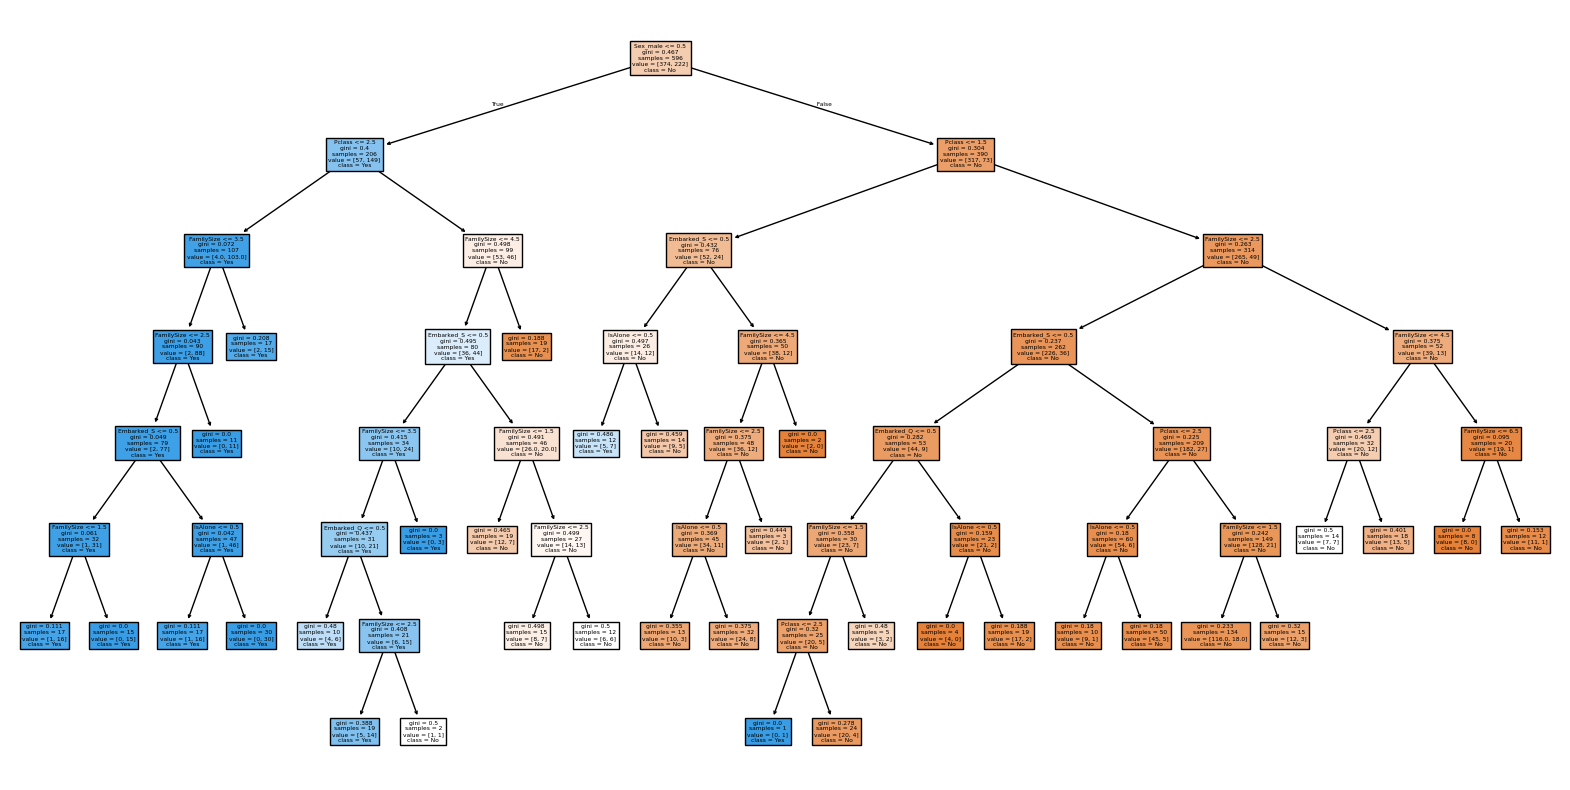

In [133]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

**Takeaway:**

Decision Trees can easily overfit small datasets like Titanic, but pruning helps control variance. Compared to Logistic Regression, trees capture non-linear patterns but require careful tuning.